In [1]:
import numpy as np

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
mnist.keys()                  

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

this code will retrieve the dataset

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape       

(70000, 784)

this shows the amount of data that each contain 78 features

In [3]:
y.shape 

(70000,)

there are 70000 images

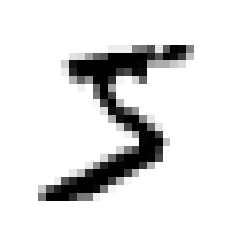

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [5]:
y[0] 

'5'

image containin the in array

In [6]:
 y = y.astype(np.uint8) 

y is been cast to an intenger

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

 the start of the training set 

In [8]:
y_train_5 = (y_train == 5) 
y_test_5 = (y_test == 5)

 True for all 5s, False for all other digits

In [9]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5) 

SGDClassifier(random_state=42)

 SGDClassifier is able to distinguish between different values

In [10]:
sgd_clf.predict([some_digit]) 

array([ True])

predict what images does represent 

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

is evaluating the SGDClassifier model prediction

In [12]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [13]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.91125, 0.90855, 0.90915])

is evaluating the accuracy 

In [14]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

this will deliver a predictio on each instance in the trainin set

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred) 

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

give a table layout with specific information

In [16]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [17]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1522)
recall_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1325)

0.6511713705958311

In [18]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred) 

0.7325171197343846

the best way to compare two classifiers

In [19]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores
threshold = 0
y_some_digit_pred = (y_scores > threshold)

return evert score and the we can make any predictions base on the score

In [20]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [21]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                          method="decision_function")

shows all scores of all instances of the trainin set

In [22]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


it conputes the precision and recall for all posible thesholds

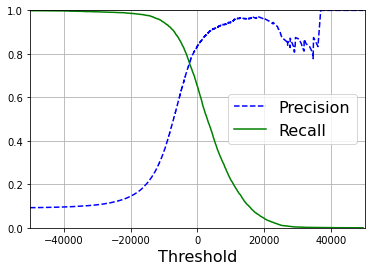

In [23]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])             
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show() 

it will precise and recall the fuctions of the threshold values

In [24]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] 

this is getting the first index of the max values

In [25]:
y_train_pred_90 = (y_scores >= threshold_90_precision) 

this is making a prediction on the training set

In [26]:
precision_score(y_train_5, y_train_pred_90)
recall_score(y_train_5, y_train_pred_90) 

0.4799852425751706

this is running the prediction precision and recall which it recalll a 48%

In [27]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

it computes the true positive rate and the false positive rate for te thresshold values

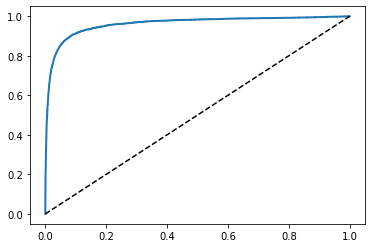

In [28]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    [...] # Add axis labels and grid
plot_roc_curve(fpr, tpr)
plt.show() 

this will produce the plot above

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores) 

0.9604938554008616

this is measuring the are under the curve

In [30]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                   method="predict_proba")


it suppose to return a array that has the probability that the instance does belong to the specific class

In [31]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

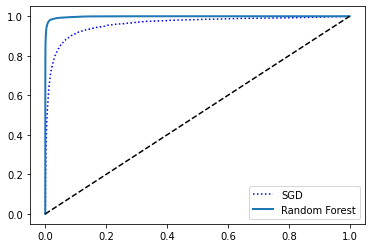

In [32]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [33]:
 roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

it measure the precision and recall the scores

In [34]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train[:100], y_train[:100]) # y_train, not y_train_5
svm_clf.predict([some_digit])

array([3], dtype=uint8)

this trains the svc on the training set, and makes a prediction

In [35]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81001374,  4.9714213 ,  3.82553096,  9.26077685,  1.84661432,
         8.2492674 ,  0.80835781, -0.20652526,  5.8583457 ,  7.11556602]])

this will return the scores per class

In [36]:
 np.argmax(some_digit_scores)

3

In [37]:
 svm_clf.classes_


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [38]:
 svm_clf.classes_[5]

5

returning the highest score

In [39]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])
len(ovr_clf.estimators_)


MemoryError: Unable to allocate 359. MiB for an array with shape (60000, 784) and data type float64

this will force Scikit-Learn to use one-versus-one or one-versus-the-rest as well as the length 

In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])


In [ ]:
 sgd_clf.decision_function([some_digit])

this will show the score that SGD classifie assigned to each class

In [ ]:
 cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

this will evaluate the SGDClassifier’s accuracy

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")


In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

this code will make prediction using cross_val_predict() function

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()


this shows an image representation of the confusion matrix

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

this will fill the diagonal with zeros to keep only the errors, and will plot the result

In [ ]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

In [ ]:
from the book This code creates a y_multilabel array containing two target labels for each digit
image: the first indicates whether or not the digit is large (7, 8, or 9), and the second
indicates whether or not it is odd. The next lines create a KNeighborsClassifier
instance

In [ ]:
 knn_clf.predict([some_digit])

this makes a prediction base on some digits

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

This code computes the average F1 score across all labels

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

this will take the mnist images and add a noise to their pixel

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

this will clean the image